In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# BB84

In [2]:
from random import randint, choice
from qiskit import QuantumCircuit,  QuantumRegister, ClassicalRegister

Alice generates a random bit stream:

In [3]:
length = 8

In [4]:
bits = [randint(0,1) for i in range(length)]
bits

[1, 0, 1, 1, 1, 1, 0, 1]

Alice chooses a random basis for each bit.

In [5]:
basis = [choice(["x","z"]) for i in range(length)]
basis

['x', 'z', 'z', 'z', 'z', 'x', 'z', 'z']

Alice encodes the bit stream into the corresponding qubit accordingly.

In [6]:
q = QuantumRegister(length)
c = ClassicalRegister(length)
qc = QuantumCircuit(q,c)

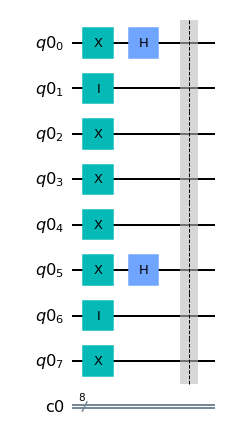

In [7]:
for i in range(length):
  if basis[i] == "z":
      if bits[i] == 0:
        qc.i(q[i])
      else:
        qc.x(q[i])
  else:
    if bits[i] == 0:
      qc.h(q[i])
    else:
      qc.x(q[i])
      qc.h(q[i])

qc.barrier()
qc.draw("mpl")


Alice sends the state to Bob, and he will chose a random basis to measure the qubits.

In [8]:
basis_bob = [choice(["x","z"]) for i in range(length)]
basis_bob

['z', 'z', 'x', 'z', 'z', 'z', 'x', 'x']

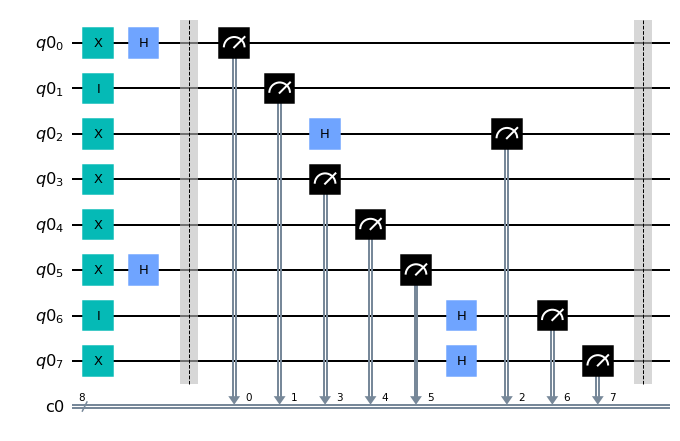

In [9]:
for i in range(length):
  if basis_bob[i] == "z":
    qc.measure(q[i],c[i])
  else:
    qc.h(q[i])
    qc.measure(q[i],c[i])

qc.barrier()
qc.draw("mpl")

In [10]:
# run the simulation on an ideal quantum computer
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1)
result = job.result()
counts = result.get_counts()
print(counts)

{'00111001': 1}


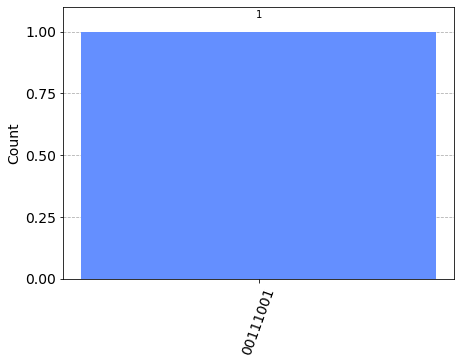

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [12]:
output = list(counts.keys())[0]
output = [int(c) for c in output] 
output

[0, 0, 1, 1, 1, 0, 0, 1]

Alice and Bob over the classical channel, and make a simmetric key out of the bits that were encoded and measured using the same basis.

In [13]:
cipher = [output[i] for i in range(length) if basis[i] == basis_bob[i]]
cipher

[0, 1, 1]